# Cobb Douglas production function of Singapore
<br><br>
In our study of identifying present economic growth of Sigapore we've decided to use the Cobb Douglas function.<br>
It has the following form: <br>
$$GDP = A * K^a * L^b$$<br>
Where A is referred as the coefficient of technical advancement. <br>
After cleaning our data and performing multivariate regression we found positive autocorrelation, which contributed bad to our model. So we decided to add another variable which fit perfectly into our model and has a great contribution to GDP, "Total export of products and services". <br>
So now our equation took the following form:<br>
$$GDP = A * K^a * L^b * E^y$$<br>

# Data analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('docs/alldata.csv')

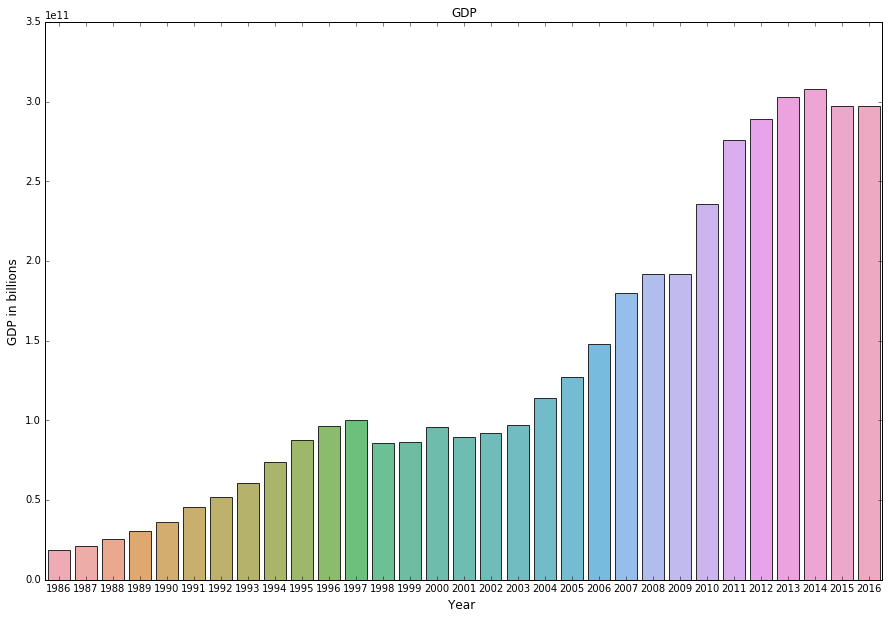

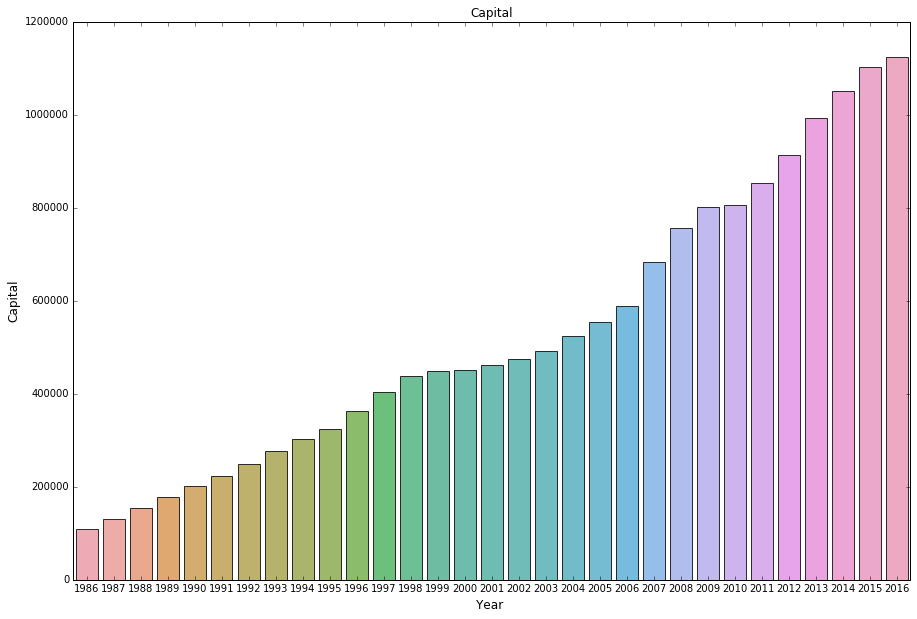

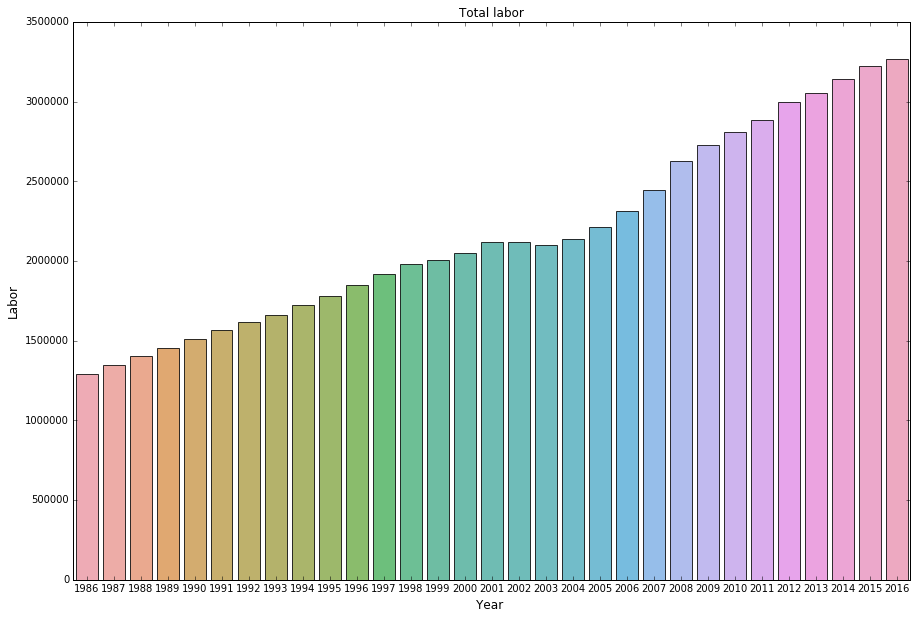

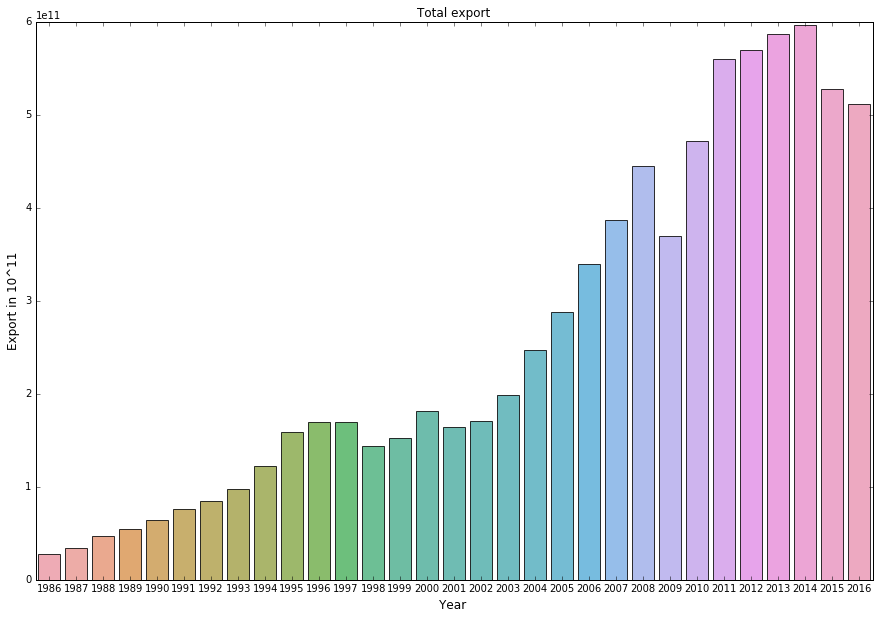

In [3]:
def show_plot(data, title, y_name):
    plt.figure(figsize=(15,10))
    time_series = sns.barplot(x=df.year, y=data, alpha=0.8)
    plt.title(title)
    plt.ylabel(y_name, fontsize=12)
    plt.xlabel('Year ', fontsize=12)
    rects = time_series.patches
    plt.show()
show_plot(df.GDP, "GDP", "GDP in billions")
show_plot(df.Capital, 'Capital', 'Capital')
show_plot(df.Labor, 'Total labor', 'Labor')
show_plot(df.Export, "Total export", "Export in 10^11")

$$Y = A* L^β * K^α * E^γ$$

Y - GDP <br>
L - labour input <br>
K - capital input<br>
A - total factor productivity<br>
E - total export and services<br>
a, b, y are the output elasticities of capital and labor, respectively<br>
<br>
$$ln(Y) = ln(A* L^b * K^a * E^y)$$<br>
$$ln(Y) = ln(A) + a*ln(K) + b*ln(L) + y*ln(E)$$<br>
Assuming perfect competition and a + b + y = 1
$$ln(Y) = ln(A) + (1-a)*ln(L) + a*ln(K) + (1-a-b)ln(E)$$<br>

In [4]:
df['ln_Capital'] = [math.log(x) for x in df.Capital]
df['ln_Labor'] = [math.log(x) for x in df.Labor]
df['ln_GDP'] = [math.log(x) for x in df.GDP]
df['ln_Export'] = [math.log(x) for x in df.Export]
df.head()

,Unnamed: 0,year,Capital,Labor,GDP,ln_GDP,ln_Capital,ln_Labor,Export,ln_Export
0,0,1986,108727.9,1290605,1.856929e+10,23.644775,11.596604,14.070622,2.764424e+10,24.042683
1,1,1987,131794.8,1345689,2.089763e+10,23.762902,11.789001,14.112417,3.430821e+10,24.258651
2,2,1988,154861.7,1400773,2.533723e+10,23.955541,11.950288,14.152535,4.686467e+10,24.570530
3,3,1989,177929.4,1455857,3.042357e+10,24.138484,12.089142,14.191105,5.462309e+10,24.723722
4,4,1990,200997.1,1510941,3.615203e+10,24.310999,12.211046,14.228243,6.404507e+10,24.882853


Create Linear Regression where we fit Labor, Capital, Export and GDP

In [5]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [6]:
x_train = df[['ln_Capital', 'ln_Labor', 'ln_Export']]
y_train = df['ln_GDP']

In [7]:
regression = regression.fit(x_train, y_train)

/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [8]:
A = regression.intercept_
Alpha = regression.coef_[0]
Beta = regression.coef_[1]
Gamma = regression.coef_[2]

print('ln(Y) = ln({}) + {}*ln(K) + {}*ln(L)+{}*ln(E)'.format(A, Alpha, Beta, Gamma))


ln(Y) = ln(-0.402730061765) + 0.178640585392*ln(K) + 0.434127140831*ln(L)+0.658715785171*ln(E)


As we can see α + β + γ = 0.178640586191 + 0.434127135823 + 0.658715785965 > 1. 

# Returns to scale
$Y = A * (c*L)^b * (c*K)^a * (c*E)^y$<br>
$Y = A * c^b*L^b * c^a*K^a * c^y*E^y$<br>
$Y = c^b*c^a*c^y *A*L^b*K^a$<br>
$Y = c^{b+a+y}*A*L^b*K^a$<br>
$Y = c^{b+a+y}* Y $<br>
as a + b + y > 1 the production function has increasing returns to scale

In [9]:
from mpl_toolkits.mplot3d import Axes3D

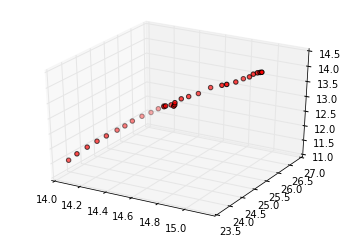

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.ln_Labor, df.ln_GDP, df.ln_Capital, c='r', marker='o')

In [11]:
import ipyvolume as ipv

In [12]:
ipv.quickscatter(df.ln_GDP, df.ln_Labor, df.ln_Capital, size=1, marker="sphere")

In [13]:
import scipy.stats as stats

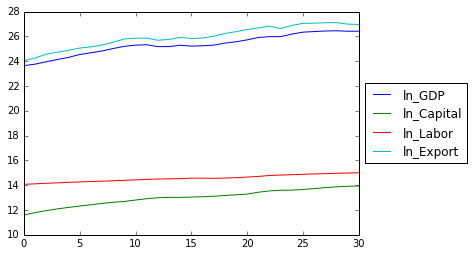

In [14]:
ax = df[["ln_GDP","ln_Capital","ln_Labor", "ln_Export"]].plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

$$ $$

# Regression <br>
Let's conduct an analysis of our regression. <br>

In [15]:
regression = smf.ols('ln_GDP ~ ln_Capital + ln_Labor + ln_Export', data=df).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ln_GDP   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     1106.
Date:                Mon, 16 Apr 2018   Prob (F-statistic):           2.36e-28
Time:                        20:41:42   Log-Likelihood:                 37.289
No. Observations:                  31   AIC:                            -66.58
Df Residuals:                      27   BIC:                            -60.84
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4027      3.215     -0.125      0.901      -6.999       6.194
ln_Capital     0.1786      0.200      0.891      0.381      -0.233       0.590
ln_Labor       0.4341      0.336      1.293      0.207      -0.255       1.123
ln_Export      0.6587      0.101      6.531      0.000       0.452       0.866
==============================================================================
Omnibus:                        4.285   Durbin-Watson:                   0.324
Prob(Omnibus):                  0.117   Jarque-Bera (JB):                1.651
Skew:                          -0.052   Prob(JB):                        0.438
Kurtosis:                       1.874   Cond. No.                     7.52e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From this we can say that X Variable1, which is our Alpha, is significant. <br>
The variance is ~99.2% <br>
The Significance F is our p-value for F. It is < 0.01, which tells us that our regression is significant on a 99% level. <br>
Judging by the p-values of our coefficients, we can say that only Gamma is significant.<br>

$$ $$

# Autocorrelation(Durbin-Watson)
<br>
Now we'll test our dataset on autocorrelation.

As we can see from the above regression analysis, our Durbin-Watson statistic is 0.324;

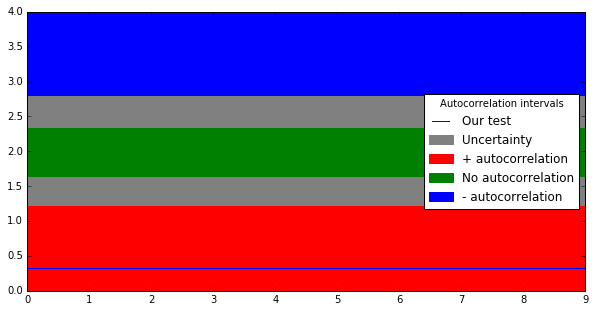

In [16]:
y = [x for x in range(10)]
lower = [1.21 for x in range(10)]
upper = [1.65 for x in range(10)]
our = [0.324 for x in range(10)]
fig = plt.figure(figsize=(10, 5))
plt.fill_between(y, lower, upper, color='gray')
plt.plot(y, our)
plt.fill_between(y,0,lower, color='red')
plt.fill_between(y,upper, 4-1.65, color='green')
plt.fill_between(y,4-1.21,4,color='blue')
plt.fill_between(y,upper, 4-1.65, color='green')
plt.fill_between(y,4-1.65,4-1.21, color='gray')
plt.legend(['Our test', 'Uncertainty', '+ autocorrelation', 'No autocorrelation', '- autocorrelation'], loc='right', title='Autocorrelation intervals')

The lower margin of Durbin-Watson statistic for our case is 0.941. <br>
Our values is much lower that the critial, so we reject the null hypothesis of no serial correlation.<br>
We will use the Hildrenth-Lu algorithm. This supposes estimating the parameters of the model in which the ρ parameter has an unknown value.<br>
With the help of this algorithm, we estimate the linear regression linear log model’s
parameters. The first step of this algorithm is determining the type of positive autocorrelation (ρ > 0) or negative (ρ < 0), with the help of the Durbin-Watson statistic, in order to find the positive value interval either [0, 1] or [-1, 0]. In our case, the autocorrelation of errors is positive, because 0 < DWcalc = 0.5179012442196981 < d1 = 1.48. The second step is fixing the values of the ρ parameter, which will be used in estimating the parameters of the model:
<br>
<br>
$$LOG(gdp_t) - r*LOG(gdp_(t-1)) = LOG(A)*(1-ρ) + a*(LOG(K_t)-r*LOG(K_{(t-1)}))+ b*(LOG(L_t)-r*LOG(L_{(t-1)}))+y*(LOG(E_t)-r*(LOG(E_{(t-1)}))+u_t$$
<br>

In [21]:
rho = [-1+x*0.01 for x in range(1,200)]
ln_gdp = df['ln_GDP'].tolist()
ln_cap = df['ln_Capital'].tolist()
ln_lab = df['ln_Labor'].tolist()
ln_exp = df['ln_Export'].tolist()
ln_a = [-0.402730061765 for x in range(1,30)]
ln_gdp1 = ln_gdp[1:]
ln_cap1 = ln_cap[1:]
ln_lab1 = ln_lab[1:]
ln_exp1 = ln_exp[1:]
smallest = [100000,0]
reg = []
all_means = []
for index,rho in enumerate(rho):
    ln_gdp_rho = [elem-rho*ln_gdp[ids] for ids, elem in enumerate(ln_gdp1)]
    ln_cap_rho = [elem-rho*ln_cap[ids] for ids, elem in enumerate(ln_cap1)]
    ln_lab_rho = [elem-rho*ln_lab[ids] for ids, elem in enumerate(ln_lab1)]
    ln_exp_rho = [elem-rho*ln_exp[ids] for ids, elem in enumerate(ln_exp1)]
    ln_r_rho = [1-rho for x in range(30)]
    trial = pd.DataFrame({
        'G':ln_gdp_rho,
        'C':ln_cap_rho,
        'L':ln_lab_rho,
        'A':ln_r_rho,
        'E':ln_exp_rho
    })
    lin = smf.ols('G ~ A + C + L + E - 1', data=trial).fit()
    ssr = lin.mse_resid
    if ssr < smallest[0]:
        smallest[0] = ssr
        smallest[1] = rho
        reg.append(lin)
    all_means.append(ssr)
print ("rho = %r"%smallest[1])

rho = 0.8500000000000001


In [18]:
regression = reg[len(reg)-1]
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      G   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     60.77
Date:                Mon, 16 Apr 2018   Prob (F-statistic):           7.02e-12
Time:                        20:41:45   Log-Likelihood:                 54.107
No. Observations:                  30   AIC:                            -100.2
Df Residuals:                      26   BIC:                            -94.61
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
A             -1.0133      4.846     -0.209      0.836     -10.974       8.947
C              0.3012      0.337      0.894      0.379      -0.391       0.994
L              0.4211      0.618      0.681      0.502      -0.849       1.691
E              0.6269      0.073      8.637      0.000       0.478       0.776
==============================================================================
Omnibus:                        0.718   Durbin-Watson:                   1.477
Prob(Omnibus):                  0.699   Jarque-Bera (JB):                0.749
Skew:                          -0.321   Prob(JB):                        0.688
Kurtosis:                       2.567   Cond. No.                     3.12e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

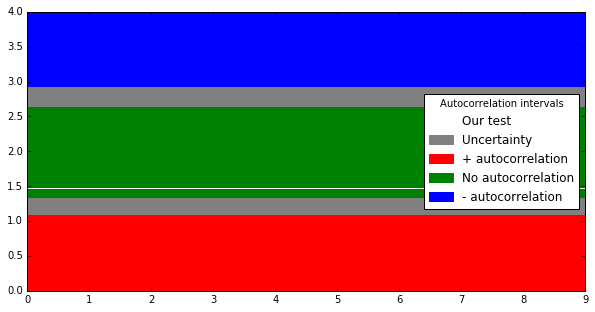

In [20]:
y = [x for x in range(10)]
lower = [1.085 for x in range(10)]
upper = [1.345 for x in range(10)]
our = [1.477 for x in range(10)]
fig = plt.figure(figsize=(10, 5))
plt.fill_between(y, lower, upper, color='gray')
plt.plot(y, our,color='white')
plt.fill_between(y,0,lower, color='red')
plt.fill_between(y,upper, 4-1.345, color='green')
plt.fill_between(y,4-1.085,4,color='blue')
plt.fill_between(y,upper, 4-1.345, color='green')
plt.fill_between(y,4-1.345,4-1.085, color='gray')
plt.legend(['Our test', 'Uncertainty', '+ autocorrelation', 'No autocorrelation', '- autocorrelation'], loc='right', title='Autocorrelation intervals')

$$GDP = 3.89 * K^{0.30} * L^{0.42} * E^{0.62} * u_t$$

The null hypothesis is that we have heteroscedasticity in our error terms, and the alternative is that we have homoscedasticity in our error terms. We cannot confirm the null hypothesis with 95% level, but we can conclude that we have heteroscedasticity with a 90% level, which isn't something we would take as granted.

$$ $$

# Breush-Godfrey test


As we can see prob is higher than 0.05 so we assume that there is no autocorrelation of first and second order. That means that Assumtion 2 (the absence of auto-correlation of random variables) and 4(Independence between an independent variable and a random variable) are taken.<br>
<img src='img/Breush-Godfrey.png'>

# White test

From the table it is visible that prob is higher than 0.05. So we take Null hypotesis of absence of heteroscedasticity. Assumption 3 is true. <br>
<img src='img/White.png'>

# Jarque-Bera test

from the histogram graphic we can see that prob is higher than 0.05 so we take null hypotesis about normal distribution. Assumption 6 is true. <br>
<img src='img/Jarque-Bera.png'>

# Conclusion 
We can conclude that the economic growth process in Singapore has been influenced in a positive manner by the stock of capital and exports. Although the function is supposed to give us a good prediction on Labor and units of Labor needed, to increase GDP by some increment. As we've seen above, this cannot be said for Singapore or, most likely, needs more research. But we've discovered another great factor of influence on Singapore's GDP - total Export. It mimics GDP nearly perfectly on the graph and surely has a great influence on it.